In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import logsumexp
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
np.random.seed(0)

# 0. Load boston housing prices dataset

In [76]:
boston = load_boston()
x = boston['data']
N = x.shape[0]
x = np.concatenate((np.ones((506,1)),x),axis=1) #add constant one feature - no bias needed
d = x.shape[1]
y = boston['target']

idx = np.random.permutation(range(N))

# 1.1 Helper function

In [77]:
def l2(A,B):
    '''
    Input: A is a Nxd matrix
           B is a Mxd matirx
    Output: dist is a NxM matrix where dist[i,j] is the square
    norm between A[i,:] and B[j,:]
    i.e. dist[i,j] = ||A[i,:]-B[j,:]||^2
    '''
    A_norm = (A**2).sum(axis=1).reshape(A.shape[0],1)
    B_norm = (B**2).sum(axis=1).reshape(1,B.shape[0])
    dist = A_norm+B_norm-2*A.dot(B.transpose())
    return dist

# 1.2 Locally Reweighted Least Squares function

In [78]:
def LRLS(test_datum,x_train,y_train,tau,lam=1e-5):
    '''
    Input: test_datum is a dx1 test vector
           x_train is the N_train x d design matrix
           y_train is the N_train x 1 targets vector
           tau is the local reweighting parameter
           lam is the regularization parameter
    output is y_hat the prediction on test_datum
    '''
    #1. Compute distance based weights
    norm_x_minus_xi = l2(test_datum.T, x_train)[0,:].reshape(-1,1) 
    a = np.exp((-norm_x_minus_xi/(2*tau*tau)) - logsumexp(-norm_x_minus_xi/(2*tau*tau)))
    A = np.identity(norm_x_minus_xi.shape[0])*a
        
    #2. Compute w_star
    LHS = (np.matmul(x_train.T, np.matmul(A,x_train)) + (lam*np.identity(x_train.shape[1])))
    RHS = np.matmul(x_train.T, np.matmul(A,y_train))
    w_star = np.linalg.solve(LHS,RHS)

    #3. Compute y_hat (prediction of y)
    y_hat = np.matmul(test_datum.T, w_star)[0,0] 
    
    return y_hat

# 1.3 Validation function

In [79]:
def run_validation(x,y,taus,val_frac):
    '''
    Input: x is the N x d design matrix
           y is the N x 1 targets vector    
           taus is a vector of tau values to evaluate
           val_frac is the fraction of examples to use as validation data
    output is
           a vector of training losses, one for each tau value
           a vector of validation losses, one for each tau value
    '''
    #1. Split testing and training data & initialise variables
    x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=val_frac, random_state=69)
    y_train = y_train.reshape(-1,1)
    y_validation = y_validation.reshape(-1,1)
    y_hat_train = []
    y_hat_validation = []
    
    print(y_train)
    
    #2. Iterate for all values of tau and for all x_train and x_validation
    i=0
    for tau in taus:
        for test_datum in x_train:
            test_datum = test_datum.reshape(-1,1)
            y_hat_curr = LRLS(test_datum,x_train,y_train,tau) #returns a (1,1)
            y_hat_train.append(y_hat_curr)
        i+=1
        print("Train iteration #",i,"from a total",len(taus))        
    np_y_hat_train = np.array(y_hat_train).reshape(-1,x_train.shape[0])

    print(np_y_hat_train)
    
    i=0
    for tau in taus:
        for test_datum in x_validation:
            test_datum = test_datum.reshape(-1,1)
            y_hat_curr = LRLS(test_datum,x_train,y_train,tau) #returns a (1,1)
            y_hat_validation.append(y_hat_curr)
        i+=1
        print("Validation iteration #",i,"from a total",len(taus)) 
    np_y_hat_validation = np.array(y_hat_validation).reshape(-1,x_validation.shape[0])
    
    #3. Compute the training and validation losses
    print(y_train.shape, np_y_hat_train.shape)
    train_losses = (1/y_train.shape[0]) * np.sum(0.5*np.square(y_train.T - np_y_hat_train),1) #one value for each tau
    validation_losses = (1/y_validation.shape[0]) * np.sum(0.5*np.square(y_validation.T - np_y_hat_validation),1) #one value for tau
    
    return train_losses, validation_losses

# 2. Main

[[22.9]
 [14.5]
 [32. ]
 [41.7]
 [19.3]
 [48.3]
 [44.8]
 [20.1]
 [20. ]
 [16.8]
 [29.8]
 [50. ]
 [25. ]
 [19.6]
 [23.8]
 [16.6]
 [13.4]
 [22.2]
 [22.5]
 [39.8]
 [50. ]
 [16.2]
 [22.6]
 [23.7]
 [25. ]
 [12.7]
 [10.9]
 [17.8]
 [23.1]
 [18.5]
 [25.3]
 [21.4]
 [15.4]
 [27.5]
 [22. ]
 [17. ]
 [ 9.7]
 [24.2]
 [23.1]
 [22.2]
 [34.9]
 [20.4]
 [22.8]
 [25. ]
 [13.4]
 [32.7]
 [21.6]
 [12.7]
 [22.6]
 [30.1]
 [31.7]
 [31.5]
 [22.7]
 [14.1]
 [ 6.3]
 [50. ]
 [19.6]
 [12. ]
 [15.3]
 [20.2]
 [24.5]
 [22.9]
 [27. ]
 [21.1]
 [20.8]
 [14.4]
 [10.5]
 [19.8]
 [50. ]
 [11.7]
 [20. ]
 [10.2]
 [22.7]
 [14.6]
 [17.5]
 [19.4]
 [18.2]
 [36.2]
 [14.4]
 [17.1]
 [ 7. ]
 [22. ]
 [23.9]
 [23.9]
 [28.2]
 [23.2]
 [29.6]
 [13.1]
 [13.9]
 [22.9]
 [18.2]
 [22.5]
 [13.8]
 [20. ]
 [18.8]
 [ 5. ]
 [20.6]
 [10.4]
 [23.2]
 [11. ]
 [13. ]
 [ 5.6]
 [18.4]
 [33.8]
 [13.8]
 [19.6]
 [15.2]
 [24.1]
 [17.7]
 [23.2]
 [14.9]
 [19.2]
 [13.5]
 [20.5]
 [16.7]
 [28.7]
 [25.2]
 [20.4]
 [16.5]
 [19.6]
 [15.7]
 [25. ]
 [33.2]
 [27.9]
 [13.8]


Train iteration # 142 from a total 200
Train iteration # 143 from a total 200
Train iteration # 144 from a total 200
Train iteration # 145 from a total 200
Train iteration # 146 from a total 200
Train iteration # 147 from a total 200
Train iteration # 148 from a total 200
Train iteration # 149 from a total 200
Train iteration # 150 from a total 200
Train iteration # 151 from a total 200
Train iteration # 152 from a total 200
Train iteration # 153 from a total 200
Train iteration # 154 from a total 200
Train iteration # 155 from a total 200
Train iteration # 156 from a total 200
Train iteration # 157 from a total 200
Train iteration # 158 from a total 200
Train iteration # 159 from a total 200
Train iteration # 160 from a total 200
Train iteration # 161 from a total 200
Train iteration # 162 from a total 200
Train iteration # 163 from a total 200
Train iteration # 164 from a total 200
Train iteration # 165 from a total 200
Train iteration # 166 from a total 200
Train iteration # 167 fro

Validation iteration # 128 from a total 200
Validation iteration # 129 from a total 200
Validation iteration # 130 from a total 200
Validation iteration # 131 from a total 200
Validation iteration # 132 from a total 200
Validation iteration # 133 from a total 200
Validation iteration # 134 from a total 200
Validation iteration # 135 from a total 200
Validation iteration # 136 from a total 200
Validation iteration # 137 from a total 200
Validation iteration # 138 from a total 200
Validation iteration # 139 from a total 200
Validation iteration # 140 from a total 200
Validation iteration # 141 from a total 200
Validation iteration # 142 from a total 200
Validation iteration # 143 from a total 200
Validation iteration # 144 from a total 200
Validation iteration # 145 from a total 200
Validation iteration # 146 from a total 200
Validation iteration # 147 from a total 200
Validation iteration # 148 from a total 200
Validation iteration # 149 from a total 200
Validation iteration # 150 from 

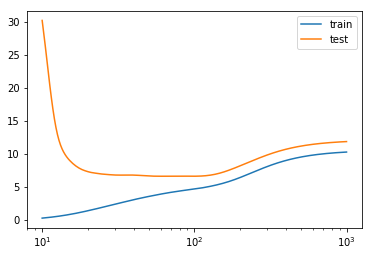

In [80]:
if __name__ == "__main__":
    taus = np.logspace(1.0,3,200) #from 10 to 1000, 200 different taus
    train_losses, test_losses = run_validation(x,y,taus,val_frac=0.3)
    print(train_losses, test_losses)
    plt.semilogx(taus, train_losses, label='train')
    plt.semilogx(taus, test_losses, label='test')
    plt.legend()
    plt.show()